In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Web Scraper

In [ ]:
from bs4 import BeautifulSoup
import requests

Require input is the URL.

In [ ]:
url = 'https://www.britannica.com/topic/list-of-state-capitals-in-the-United-States-2119210'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')
print(soup)

<!DOCTYPE html>
<html class="topic-desktop ui-unknown0 ui-unknown" lang="en">
<head prefix="og: https://ogp.me/ns# fb: https://ogp.me/ns/fb#">
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.britannica.com/mendel-resources/3-148" rel="dns-prefetch"/>
<link href="https://cdn.britannica.com/mendel-resources/3-148" rel="preconnect"/>
<link as="script" href="https://www.googletagservices.com/tag/js/gpt.js" rel="preload"/>
<link href="/favicon.png" rel="icon"/>
<meta content="This is a list of the cities that are state capitals in the United States, ordered alphabetically by state. The list also provides the most recent U.S. census population for each city as well as an estimated population. (This list does not include the capital of the United States, Washington, D.C.)" name="description"/>
<meta content="list of state capitals in the United States, e

Find all tables in the page. In this website, though, there's only one so it's simple.

In [ ]:
soup.find_all('table')

[<table data-sortable-table="true"> <thead> <tr> <th data-col-type="text" data-sortable-type="alpha">state</th> <th data-col-type="text" data-sortable-type="alpha">capital</th> <th data-col-type="number" data-sortable-type="numeric">population of capital: census</th> <th data-col-type="number" data-sortable-type="numeric">population of capital: estimated</th> </tr> </thead> <tbody> <tr> <td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Alabama-state">Alabama</a></td> <td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Montgomery-Alabama">Montgomery</a></td> <td>(2020) 200,603</td> <td>(2021 est.) 198,665</td> </tr> <tr> <td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Alaska">Alaska</a></td> <td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Juneau">Juneau</a></td> <td>(2020) 32,255</td>

Let's first get just the title of the table.

*Note: `<th>` tag defines a header cell in an HTML table*

In [ ]:
titles = soup.find_all('th')
titles

[<th data-col-type="text" data-sortable-type="alpha">state</th>,
 <th data-col-type="text" data-sortable-type="alpha">capital</th>,
 <th data-col-type="number" data-sortable-type="numeric">population of capital: census</th>,
 <th data-col-type="number" data-sortable-type="numeric">population of capital: estimated</th>]

Since we do not need the tags, let's clean up the data.

In [ ]:
titles_list = [title.text for title in titles]
titles_list

['state',
 'capital',
 'population of capital: census',
 'population of capital: estimated']

If the output still contains newline and other symbols that are not needed, you can further clean the data using, for example, ```.strip()```

Next, create a dataframe

In [ ]:
import pandas as pd

df = pd.DataFrame(columns = titles_list)
df

,state,capital,population of capital: census,population of capital: estimated


Let's scrape the remaining data and fill this table!

In [ ]:
rows = soup.find_all('tr')
len(rows)

51

The data of our interest are within the scope of **td** tags.

*Note: `<td>` tag defines a standard data cell in an HTML table.*

In [ ]:
# -- Long version --
# row_data = []
# for row in rows:
#   row_data.append(row.find_all('td'))

# -- Short version --
row_data = [row.find_all('td') for row in rows]
row_data

[[],
 [<td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Alabama-state">Alabama</a></td>,
  <td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Montgomery-Alabama">Montgomery</a></td>,
  <td>(2020) 200,603</td>,
  <td>(2021 est.) 198,665</td>],
 [<td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Alaska">Alaska</a></td>,
  <td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Juneau">Juneau</a></td>,
  <td>(2020) 32,255</td>,
  <td>(2021 est.) 31,973</td>],
 [<td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Arizona-state">Arizona</a></td>,
  <td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Phoenix-Arizona">Phoenix</a></td>,
  <td>(2020) 1,608,139</td>,
  <td>(2021 est.) 1,624,569</td>],
 [<

The first row collected has no value, thus an empty list.

In [ ]:
row_data[0]

[]

Turns out the first row is actually here

In [ ]:
row_data[1]

[<td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Alabama-state">Alabama</a></td>,
 <td><a class="md-crosslink sortable" data-show-preview="true" href="https://www.britannica.com/place/Montgomery-Alabama">Montgomery</a></td>,
 <td>(2020) 200,603</td>,
 <td>(2021 est.) 198,665</td>]

However, we only want the text portion.

In [ ]:
print(row_data[1][0].text)
print(row_data[1][1].text)
print(row_data[1][2].text)
print(row_data[1][3].text)

Alabama
Montgomery
(2020) 200,603
(2021 est.) 198,665


Therefore, more cleaning is necessary.

Add the remaining rows to the dataframe.

But does this code work?

In [ ]:
for each_row_data in row_data:
  state=[]
  for each_row_data_elem in each_row_data:
    state.append(each_row_data_elem.text)

  length = len(df)
  df.loc[length] = state


ValueError: cannot set a row with mismatched columns

In [ ]:
df

,state,capital,population of capital: census,population of capital: estimated


TODO:

- Scrape other table from wikipedia
- Generate a new table/tables using dataframe
- Feel free to use other html tags
- Clean & preprocess

---

Other websites (for instance)
- https://www.timesjobs.com/
- https://www.tripadvisor.com/

# Coursework - Bermuda Triangle

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

SUMMARY_URL = "https://en.wikipedia.org/api/rest_v1/page/summary/Bermuda_Triangle"
HTML_URL = "https://en.wikipedia.org/api/rest_v1/page/html/Bermuda_Triangle"

def clean_text(s):
    return re.sub(r'\s+', ' ', s).strip()

# --- Fetch summary ---
summary_data = requests.get(SUMMARY_URL, headers={"User-Agent": "MyApp/1.0"}).json()
print("Title:", summary_data["title"])
print("Description:", summary_data.get("description"))
print("Extract:", summary_data.get("extract")[:300], "...")

# --- Fetch full HTML ---
html = requests.get(HTML_URL, headers={"User-Agent": "MyApp/1.0"}).text

Title: Bermuda Triangle
Description: Urban legend based on region in North Atlantic
Extract: The Bermuda Triangle, also known as the Devil's Triangle, is a loosely defined region in the North Atlantic Ocean, roughly bounded by Florida, Bermuda, and Puerto Rico. Since the mid-20th century, it has been the focus of an urban legend suggesting that many aircraft, ships, and people have disappea ...


## Extract Incidents


In [14]:
def extract_incidents(html):
    soup = BeautifulSoup(html, "html.parser")
    incidents = []

    # --- Locate "Notable incidents" section ---
    notable_sec = soup.find(id="Notable_incidents")
    if not notable_sec:
        print("⚠️ No 'Notable incidents' section found")
        return pd.DataFrame(columns=["incident", "year"])

    # The parent <section> of this <h2> contains the subsections
    parent_section = notable_sec.find_parent("section")

    # Iterate through <h3> inside this section (each incident)
    for h3 in parent_section.find_all("h3"):
        title = clean_text(h3.get_text())
        # Collect following <p> siblings until next <h3>/<h2>
        summary_parts = []
        node = h3.find_next_sibling()
        while node and node.name not in ["h3", "h2"]:
            if node.name == "p":
                summary_parts.append(clean_text(node.get_text()))
            node = node.find_next_sibling()

        summary = " ".join(summary_parts)

        # Extract year (1600–2099)
        year_match = re.search(r"\b(1[6-9]\d{2}|20\d{2})\b", summary)
        year = int(year_match.group(1)) if year_match else None

        incidents.append({"incident": title, "year": year})

    return pd.DataFrame(incidents, columns=["incident", "year"])


incident_df = extract_incidents(html)

In [15]:
incident_df

,incident,year
0,HMS Atalanta,1880
1,USS Cyclops,1918
2,Carroll A. Deering,1919
3,Flight 19,1945
4,Star Tiger and Star Ariel,1948
5,Douglas DC-3,1948
6,Connemara IV,1955
7,KC-135 Stratotankers,1963


## Incident Report Visualization
- Timeline scatter

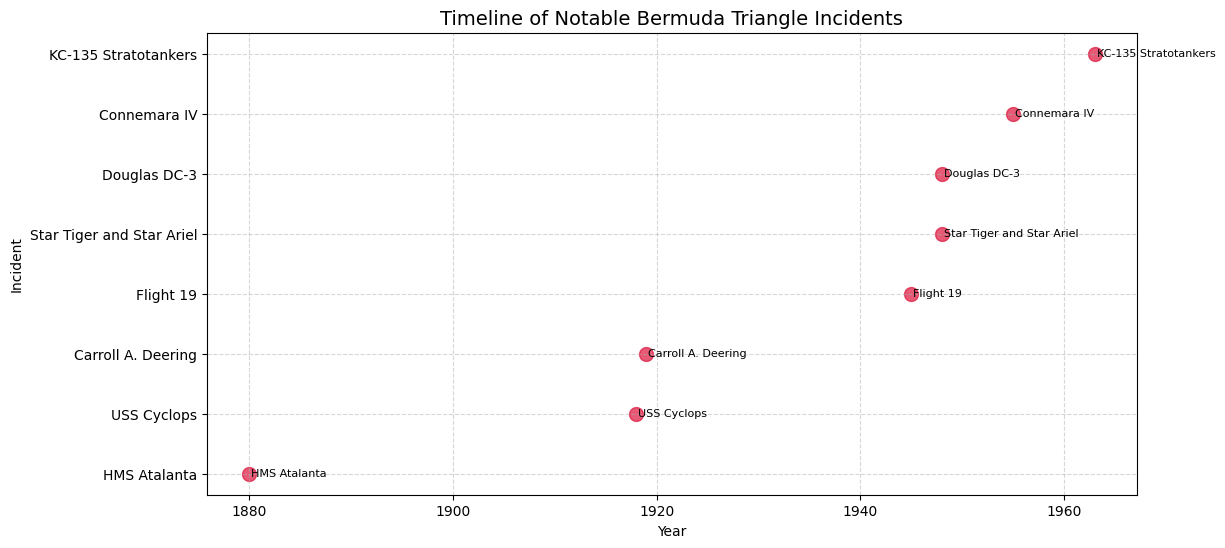

In [17]:
import matplotlib.pyplot as plt

# Drop rows with no year
timeline_df = incident_df.dropna(subset=["year"]).sort_values("year")

plt.figure(figsize=(12, 6))
plt.scatter(timeline_df["year"], timeline_df["incident"], color="crimson", s=100, alpha=0.7)

# Label points with incident name
for i, row in timeline_df.iterrows():
    plt.text(row["year"] + 0.2, i, row["incident"], fontsize=8, va="center")

plt.title("Timeline of Notable Bermuda Triangle Incidents", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Incident")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Word Cloud

In summary, the word cloud strongly suggests that the original text is a comprehensive, well-researched article about the Bermuda Triangle. It covers major incidents (like Flight 19), discusses the mysterious nature of the events, explores various theories, and relies heavily on documented, historical sources from major publications. The tone appears to be informative and fact-based, rather than sensational, given the emphasis on research and documentation.

Preprocessing HTML content...
Original HTML length: 353296 characters
Cleaned text length: 28554 characters
Number of words: 3626

Top 20 most frequent words:
triangle: 92
bermuda: 81
retrieved: 40
york: 39
times: 38
archived: 33
january: 28
original: 28
flight: 25
mystery: 23
ships: 22
december: 22
isbn: 21
sea: 20
disappearance: 20
washington: 20
post: 20
april: 19
february: 19
june: 19

Generating word cloud...


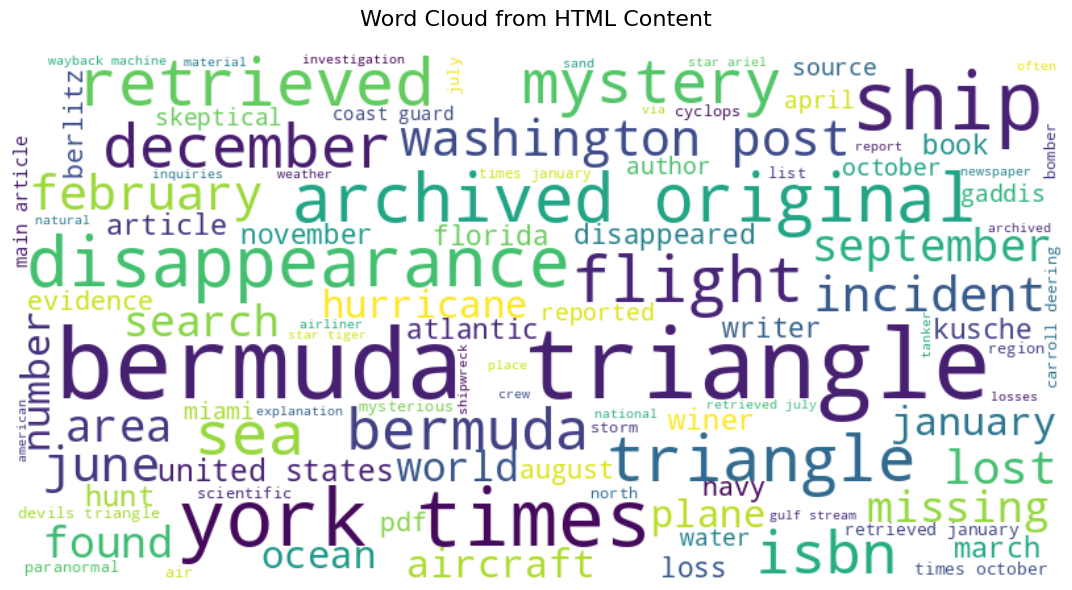

Word cloud generated successfully!


In [21]:
import requests
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download required NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

def preprocess_html_text(html_content):
    """
    Preprocess HTML content for word cloud generation
    """
    # Parse HTML and extract text
    soup = BeautifulSoup(html_content, 'html.parser')

    # Remove script and style elements
    for script in soup(["script", "style"]):
        script.extract()

    # Get text content
    text = soup.get_text()

    # Clean the text
    # Remove extra whitespace and newlines
    text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers (optional - comment out if you want to keep numbers)
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Add common web-specific stopwords
    web_stopwords = {'said', 'say', 'says', 'also', 'would', 'could', 'one', 'two', 'use', 'get', 'make', 'go', 'see', 'know', 'think', 'like', 'time', 'people', 'way', 'may', 'much', 'many', 'well', 'back', 'good', 'new', 'first', 'last', 'long', 'great', 'little', 'own', 'old', 'right', 'big', 'high', 'different', 'small', 'large', 'next', 'early', 'young', 'important', 'few', 'public', 'bad', 'same', 'able'}
    stop_words.update(web_stopwords)

    # Filter tokens
    filtered_tokens = [
        word for word in tokens
        if word not in stop_words
        and len(word) > 2  # Remove very short words
        and word.isalpha()  # Keep only alphabetic words
    ]

    return ' '.join(filtered_tokens)

def create_word_cloud(text, width=800, height=400, max_words=100, background_color='white'):
    """
    Create and display a word cloud from preprocessed text
    """
    # Generate word cloud
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color=background_color,
        max_words=max_words,
        colormap='viridis',  # You can change this to other colormaps like 'plasma', 'coolwarm', etc.
        relative_scaling=0.5,
        random_state=42
    ).generate(text)

    # Create plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud from HTML Content', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    return wordcloud

def get_word_frequencies(text, top_n=20):
    """
    Get the most frequent words and their counts
    """
    words = text.split()
    word_freq = Counter(words)
    return word_freq.most_common(top_n)


# Preprocess the HTML text
print("Preprocessing HTML content...")
cleaned_text = preprocess_html_text(html)

# Show some statistics
print(f"Original HTML length: {len(html)} characters")
print(f"Cleaned text length: {len(cleaned_text)} characters")
print(f"Number of words: {len(cleaned_text.split())}")

# Get top words
print("\nTop 20 most frequent words:")
top_words = get_word_frequencies(cleaned_text, 20)
for word, count in top_words:
    print(f"{word}: {count}")

# Create word cloud
print("\nGenerating word cloud...")
wordcloud = create_word_cloud(cleaned_text)

# Optional: Save word cloud to file
# wordcloud.to_file("wordcloud.png")

print("Word cloud generated successfully!")